In [120]:
from __future__ import division

import sys
reload(sys)
sys.setdefaultencoding("utf-8")

from datetime import datetime
from functools import wraps
import itertools

%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import statsmodels.api as sm

import seaborn as sns


In [27]:
population = pd.read_csv('population.csv', encoding='utf-8', parse_dates=["Jahr"])
ts = pd.date_range('2004', periods=12, freq='A')

df = pd.read_csv('konsumdelikte_verfahren.csv', encoding='utf-8', parse_dates=["Jahr"])
df = pd.merge(df, population, on=['Land', 'Jahr'])
df.index = df.Jahr
fields = ['Drogenhilfe in Euro -eigene Recherchen/ Anfragen', 'PKS alle BtMG-Delikte - PKS',
          'PKS (Erwerb/ Besitzdelikte) - PKS', 'Eingestellte Verfahren StA - Statistisches Bundesamt']

df['drogenhilfe_pp'] = df['Drogenhilfe in Euro -eigene Recherchen/ Anfragen'] / df['Population']
df['btmg_pp'] = df['PKS alle BtMG-Delikte - PKS'] / df['Population']
df['btmg_konsum_pp'] = df['PKS (Erwerb/ Besitzdelikte) - PKS'] / df['Population']
df['eingestellt_pp'] = df['Eingestellte Verfahren StA - Statistisches Bundesamt'] / df['Population']

(0, 1.2000000000000002)

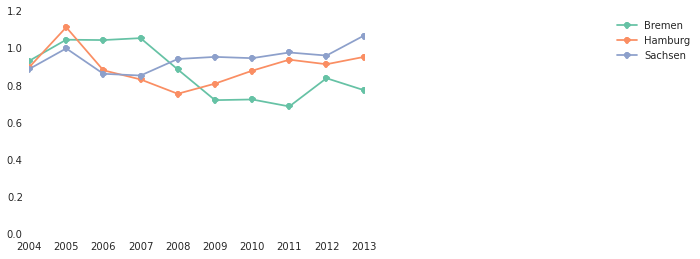

In [114]:
colors = sns.color_palette("Set2", 16)
df_grouped = df[(df['Land'] == 'Hamburg') | (df['Land'] == 'Bremen') | (df['Land'] == 'Sachsen')]
grouped = df_grouped.groupby('Land')
valkey = 'eingestellt_pp'
for i, (key, group) in enumerate(grouped):
    plt.plot_date(group[valkey].index, group[valkey] / group['btmg_konsum_pp'], c=colors[i], ls='-', label=key)
plt.legend(bbox_to_anchor=[2, 1])
plt.ylim(0)

(0, 190000.0)

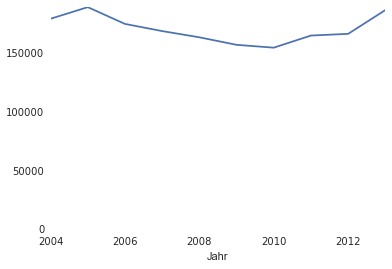

In [113]:
df.groupby('Jahr')['Eingestellte Verfahren StA - Statistisches Bundesamt'].sum().plot()
plt.ylim(0)

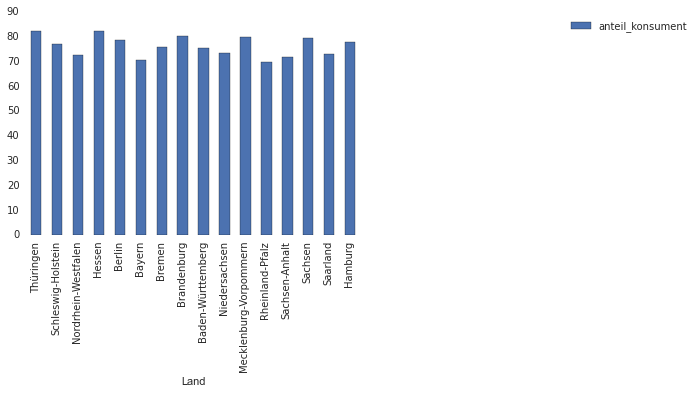

In [144]:
df_2013 = df[df['Jahr'] == datetime.date(2013,1,1)]
df_2013 = df_2013[['PKS alle BtMG-Delikte - PKS', 'PKS (Erwerb/ Besitzdelikte) - PKS', 'Anteil an allen Verfahren', 'Land']]
df_2013 = df_2013.set_index(df_2013.Land)
df_2013['anteil_konsument'] = (df_2013['PKS (Erwerb/ Besitzdelikte) - PKS'] / df_2013['PKS alle BtMG-Delikte - PKS']) * 100
df_2013['anteil_konsument'].plot(kind='bar')
# df_2013['Anteil an allen Verfahren'].plot(kind='bar', color='r')
plt.legend(bbox_to_anchor=[2, 1])

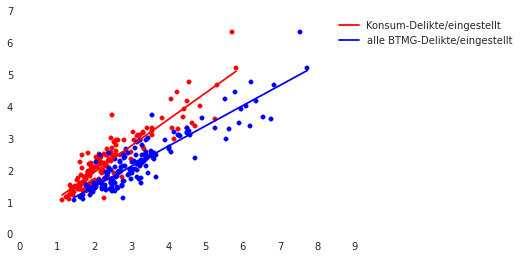

In [157]:
df_scatter = df

def fit_line(x, y):
    """Return slope, intercept of best fit line."""
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop')
    fit = model.fit()
    return fit.params[1], fit.params[0]

def scatter_line(x, y, color='r', label=''):
    plt.scatter(x, y, color=color)
    m, b = fit_line(x, y)
    N = 100
    points = np.linspace(x.min(), x.max(), N)
    plt.plot(points, m * points + b, color=color, label=label)
    plt.ylim(0)

x, y = df_scatter.btmg_konsum_pp * 1000, df_scatter.eingestellt_pp * 1000
# x, y = df_scatter.btmg_pp * 1000, df_scatter.eingestellt_pp * 1000
scatter_line(x, y, label='Konsum-Delikte/eingestellt')

x, y = df_scatter.btmg_pp * 1000, df_scatter.eingestellt_pp * 1000
scatter_line(x, y, color='b', label='alle BTMG-Delikte/eingestellt')
plt.legend(bbox_to_anchor=[1.5, 1])

In [123]:
m, b

(0.63549973017512773, 0.23716964758367393)